In [ ]:
import pandas as pd

df = pd.read_csv('../data/raw/complaints.csv')  
df.shape
df.columns
df.head()


C:\Users\Dell\AppData\Local\Temp\ipykernel_15172\3540895231.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


<Axes: title={'center': 'Complaints per Product'}, xlabel='Product'>

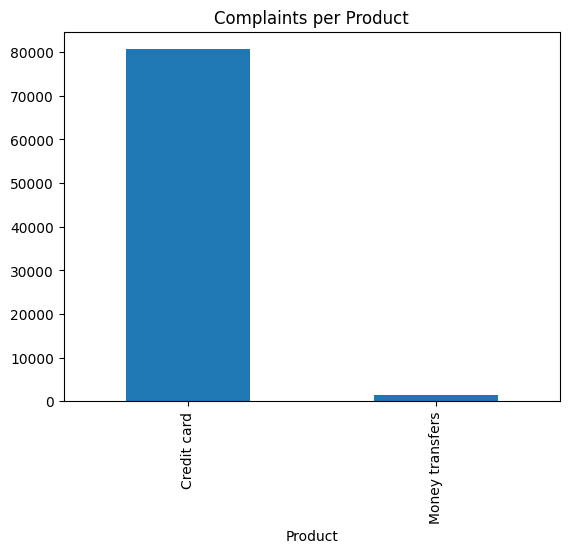

In [20]:
df['Product'].value_counts().plot(kind='bar', title='Complaints per Product')


<Axes: >

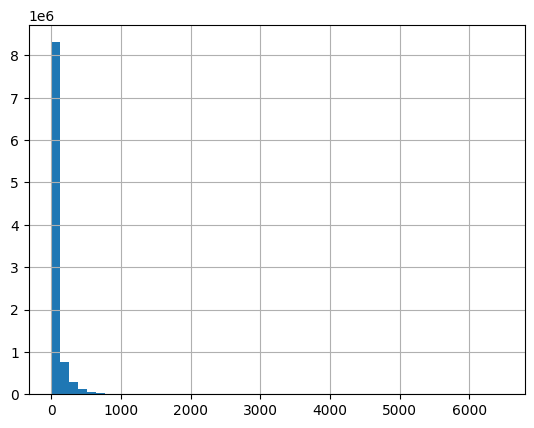

In [5]:
df['narrative_length'] = df['Consumer complaint narrative'].astype(str).apply(lambda x: len(x.split()))
df['narrative_length'].describe()
df['narrative_length'].hist(bins=50)


In [ ]:
total = len(df)
non_empty = df['Consumer complaint narrative'].notna().sum()
empty = total - non_empty
print(f"Total: {total}, With narrative: {non_empty}, Without: {empty}")



Total: 9609797, With narrative: 2980756, Without: 6629041


Filter for the 5 Products

In [5]:
products = [
    "Credit card",
    "Personal loan",
    "Buy Now, Pay Later (BNPL)",
    "Savings account",
    "Money transfers"
]

filtered_df = df[df['Product'].isin(products)]
filtered_df.shape

(82164, 18)

This will remove empty narratives

In [6]:
filtered_df = filtered_df[filtered_df['Consumer complaint narrative'].notna()]
# Check how many missing
filtered_df['Consumer complaint narrative'].isna().sum()

# Drop rows with no narrative
filtered_df = filtered_df.dropna(subset=['Consumer complaint narrative'])
filtered_df.shape



(82164, 18)

In [8]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", "", text)
    text = re.sub(r"\bi am writing to (file|submit|express).*?\b", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)


In [13]:
import re

def clean_text(text):
    if pd.isna(text):
        return ""

    # Lowercase
    text = text.lower()

    # Remove common boilerplate
    boilerplate_patterns = [
        r"^i am writing to (file|lodge|submit) a complaint", 
        r"^dear cfpb", 
        r"^thank you for your attention.*", 
        r"^to whom it may concern"
    ]
    for pattern in boilerplate_patterns:
        text = re.sub(pattern, "", text)

    # Remove URLs, emails, and unwanted chars
    text = re.sub(r"http\S+|www\S+|mailto:\S+", "", text)  # remove links
    text = re.sub(r"\S+@\S+", "", text)  # remove emails
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)  # remove special characters
    text = re.sub(r"\s+", " ", text)  # normalize whitespace

    return text.strip()


In [18]:
boilerplate = [
    r"(thank you|sincerely|XXXX|regards|please note)[.,]?",
    r"^i am writing.*?(complain|report|share).*?",
]

filtered_df["cleaned_narrative"] = filtered_df["Consumer complaint narrative"].apply(clean_text)

In [19]:
filtered_df.to_csv('../data/filtered/filtered_complaints.csv', index=False)